Marker "Asset0049.tif" @ 690178.32s
Marker "Asset0047.tif" @ 690190.35s
Marker "Control04.jpg" @ 690202.34s
Marker "Control01.jpg" @ 690214.34s
Marker "Control05.jpg" @ 690226.33s
Marker "Asset0050.tif" @ 690238.32s
Marker "" @ 690250.81s


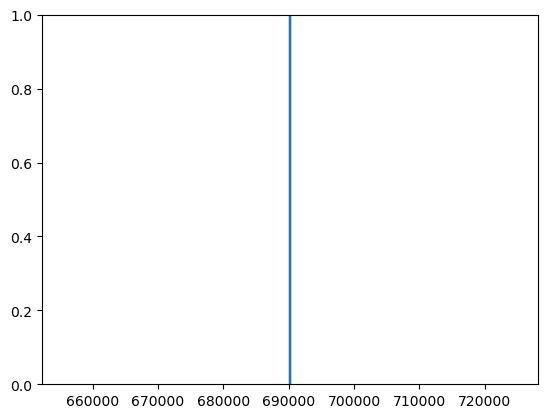

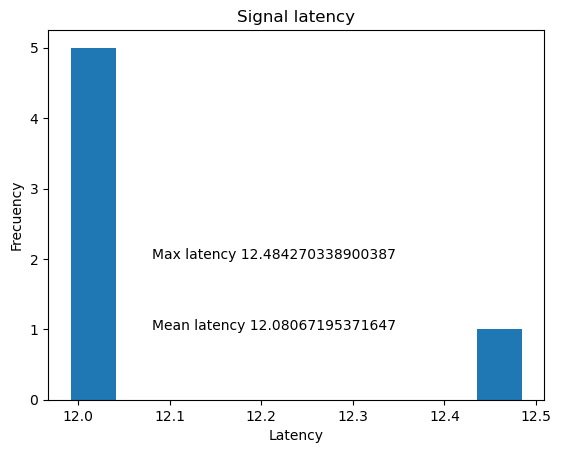

In [4]:
#%%
import pyxdf
import matplotlib.pyplot as plt
import numpy as np

data, header = pyxdf.load_xdf('emotibit_data/LSL_recording_timestamps/sub-P001_ses-S001_task-Default[_acq-]_run-001_eeg.xdf')
for stream in data:
    y = stream['time_series']
    fig,ax = plt.subplots(1,1)

    if isinstance(y, list):
        # list of strings, draw one vertical line for each marker
        for timestamp, marker in zip(stream['time_stamps'], y):
            plt.axvline(x=timestamp)
            print(f'Marker "{marker[0]}" @ {timestamp:.2f}s')
    elif isinstance(y, np.ndarray):
        # numeric data, draw as lines
        plt.plot(stream['time_stamps'], y)
    else:
        raise RuntimeError('Unknown stream format')

# %%     Check signal latency
signal_latency=np.diff(stream['time_stamps'])

fig, ax = plt.subplots(1,1)
ax.hist(signal_latency,bins=10,histtype='barstacked')
ax.set_xlabel('Latency')
ax.set_ylabel('Frecuency')
ax.set_title('Signal latency')
ax.text(np.mean(signal_latency),2,'Max latency {}'.format(max(signal_latency)),fontsize=10)
ax.text(np.mean(signal_latency),1,'Mean latency {}'.format(np.mean(signal_latency)),fontsize=10)
plt.show()



In [5]:
data, header = pyxdf.load_xdf('emotibit_data/LSL_recording_timestamps/sub-P001_ses-S001_task-Default[_acq-]_run-001_eeg.xdf')

In [6]:
data[0]['time_series']

[['Asset0049.tif'],
 ['Asset0047.tif'],
 ['Control04.jpg'],
 ['Control01.jpg'],
 ['Control05.jpg'],
 ['Asset0050.tif'],
 ['']]

In [7]:
type(data[0]['time_series'])

list

In [8]:
type(data[0]['time_series'][2][0])

str

In [3]:
(data[0]['time_stamps'])

NameError: name 'data' is not defined

In [ ]:
file1=r'emotibit_data/LSL_recording_timestamps\2023-01-17_18-09-42-832110_LM.csv'  